In [50]:
#import library for analysis
import pandas as pd
import numpy as np
#import library for visua;ization
import matplotlib.pyplot as plt
import seaborn as sns
# import library for Scaling
from sklearn.preprocessing import StandardScaler
#import library to supress warnings
import warnings
warnings.filterwarnings('ignore')
# Import libraries for train test split
from sklearn.model_selection import train_test_split
# import library for Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#import the dataset
df=pd.read_csv('Salary_dataset.csv')

In [4]:
# Print top 5 rows of dataset
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
#to check the no of rows and columns of dataset
df.shape

(30, 3)

In [6]:
# Check the info of data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
#to check the statistics of given data
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [8]:
#To check the null values
df.isnull().sum()


Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [70]:
#to check duplicate values
df.duplicated().sum()

0

In [ ]:
#there are no null values  and  duplicate so data is cleaned

In [10]:
#to check the value count of Years experience
df.YearsExperience.value_counts()


3.3     2
4.1     2
1.2     1
5.4     1
10.4    1
9.7     1
9.6     1
9.1     1
8.8     1
8.3     1
8.0     1
7.2     1
6.9     1
6.1     1
6.0     1
5.2     1
1.4     1
5.0     1
4.6     1
4.2     1
4.0     1
3.8     1
3.1     1
3.0     1
2.3     1
2.1     1
1.6     1
10.6    1
Name: YearsExperience, dtype: int64

<Figure size 2000x2500 with 0 Axes>

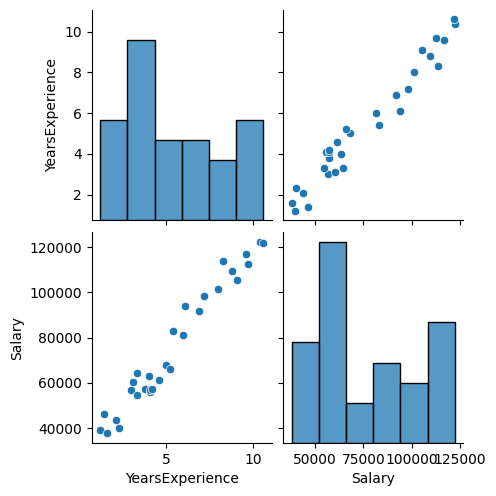

In [24]:
# Plot a pair plot
plt.figure(figsize=(20,25))
sns.pairplot(df)
plt.show()

<Axes: >

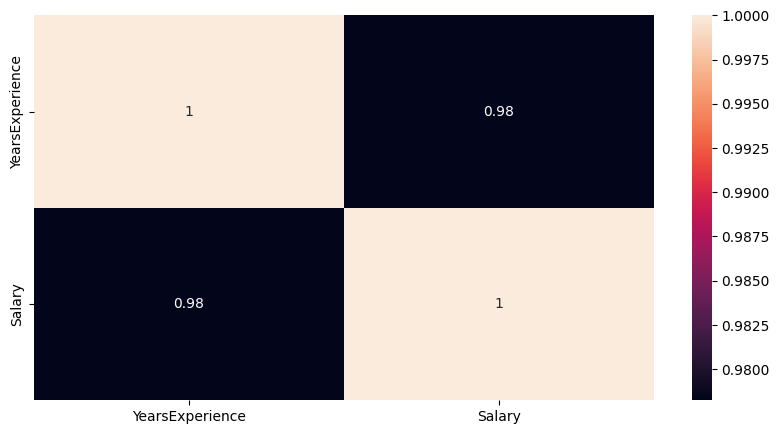

In [35]:
#as they are not corelated we use heatmap
# Plot a heatMap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

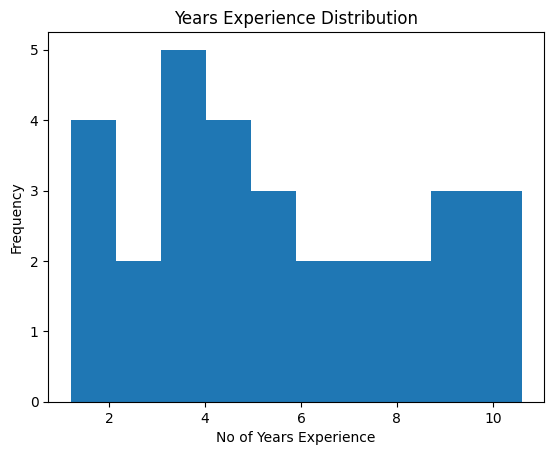

In [25]:
#To check frequency of Years of experince and plot histograms
plt.hist(df['YearsExperience'])
plt.xlabel("No of Years Experience")
plt.ylabel("Frequency")
plt.title("Years Experience Distribution")
plt.show()

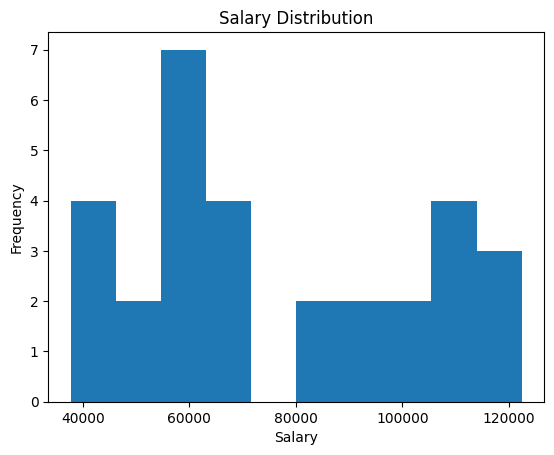

In [27]:
#To check frequency of salary and plot histogram
plt.hist(df["Salary"])
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

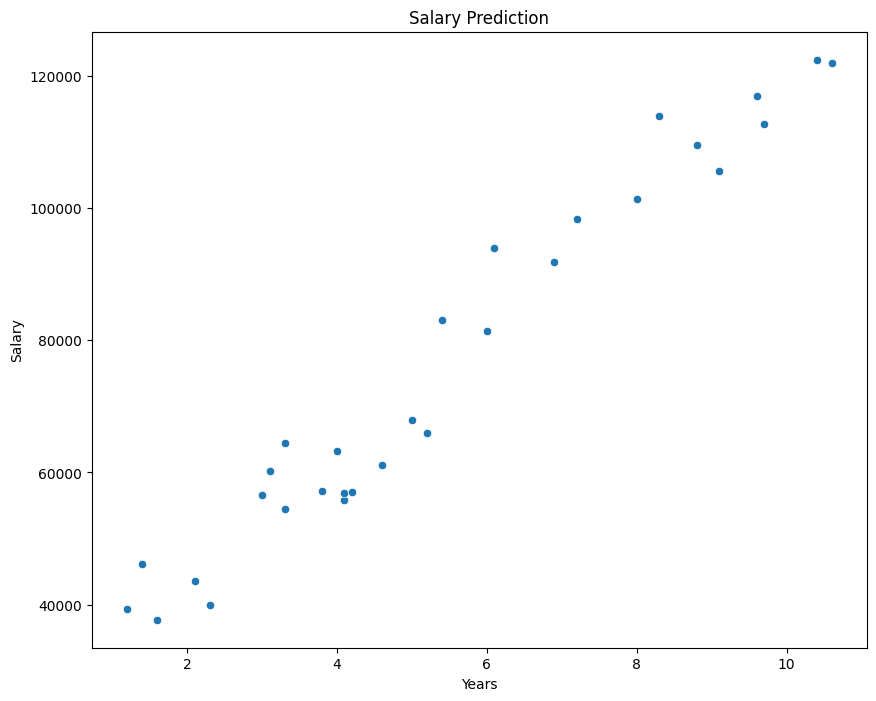

In [11]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(10,8))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [72]:
#Splitting the data
X=df['YearsExperience'].values.reshape((-1,1))
Y=df['Salary']
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42) #taking 70% training size

In [65]:
# Shape of train set
print(x_train.shape)

# Shape of test set
print(x_test.shape)

(6,)
(24,)


In [14]:
# Create new axis for x column
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [73]:
#Model Building
# Create a model by creating a Linear Regression Object
lr=LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [47]:
y_pred=lr.predict(x_test)
print('mean square error:',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))


mean square error: 49830096.855908394
mean absolute error 6286.453830757745
r2_score: 0.9024461774180497


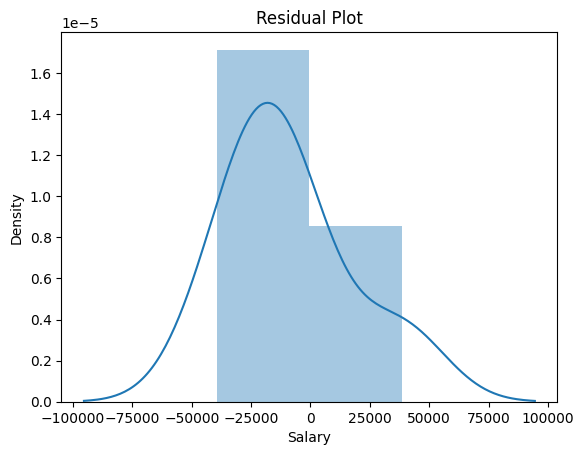

In [56]:
 #Residual Analysis
# residual
res = y_train - y_pred
# plot the residuals
sns.distplot(res)
plt.title('Residual Plot')
plt.show()

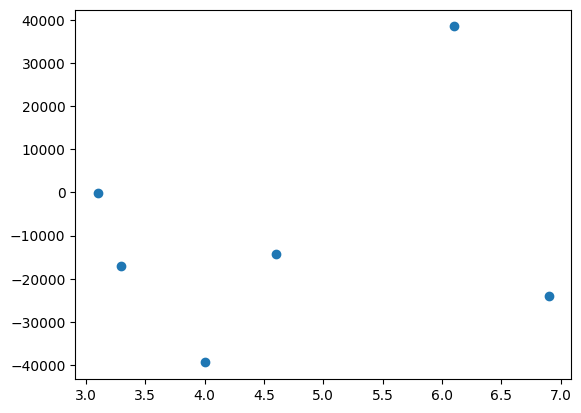

In [58]:
# look for patterns in residuals (we should not able to identify any patterns)
plt.scatter(x_train, res)
plt.show()

In [ ]:
#And there is no specific relation and are independent of each other

In [16]:
# Intercept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 24380.201479473704
Coefficient of the line: [9423.81532303]


In [ ]:
#the accuracy is 90%
# so the equation of y= 9423x + 24380